In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
dataset = pd.read_csv('/Users/xinyuewang/Downloads/normalized_by_2000_dtpts.csv')

In [3]:
dataset.columns

Index(['Unnamed: 0', 'DHI', 'DNI', 'GHI', 'Clearsky DHI', 'Clearsky DNI',
       'Clearsky GHI', 'Cloud Type', 'Dew Point', 'Solar Zenith Angle',
       'Surface Albedo', 'Wind Speed', 'Precipitable Water', 'Wind Direction',
       'Relative Humidity', 'Temperature', 'Pressure', 'Solar',
       'Normalized_Solar_lin', 'Normalized_Solar_geom', 'Normalized_Solar',
       'normalized_solar'],
      dtype='object')

In [4]:
dataset.describe()

,Unnamed: 0,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,...,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar,Normalized_Solar_lin,Normalized_Solar_geom,Normalized_Solar,normalized_solar
count,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,...,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,51469.000000,5.146900e+04,5.146900e+04,5.146900e+04,5.146900e+04
mean,25734.000000,142.666207,362.723367,375.057394,106.063592,590.835668,489.294216,2.845402,16.857473,57.715805,...,3.309082,167.285972,70.439983,23.629979,1010.325050,64.833773,1.133411e-01,1.161682e-01,8.959697e-02,4.923911e-01
std,14857.964839,119.960168,343.449828,302.558076,65.300187,301.153925,321.176407,3.008159,7.353329,25.699414,...,1.444461,91.268884,18.528721,7.431762,5.936796,84.404413,7.610893e-02,7.842858e-02,6.060831e-02,3.126045e-01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.600000,6.490000,...,0.252000,0.000000,18.500000,-3.000000,990.000000,0.000001,5.382131e-10,5.382131e-10,5.382131e-10,2.802081e-09
25%,12867.000000,59.000000,5.000000,92.000000,68.000000,443.000000,199.000000,0.000000,12.800000,39.130000,...,2.105000,117.200000,56.420000,19.000000,1010.000000,8.656580,4.267897e-02,4.343957e-02,3.365899e-02,1.942752e-01
50%,25734.000000,116.000000,281.000000,332.000000,109.000000,705.000000,538.000000,2.000000,19.000000,55.760000,...,3.498000,160.000000,71.420000,25.000000,1010.000000,26.028876,1.191304e-01,1.218217e-01,9.430417e-02,5.421062e-01
75%,38601.000000,199.000000,714.000000,627.000000,146.000000,814.000000,767.000000,6.000000,23.000000,75.100000,...,4.436000,203.200000,85.440000,29.000000,1010.000000,84.315865,1.742050e-01,1.781404e-01,1.359271e-01,7.729100e-01
max,51468.000000,507.000000,1023.000000,1066.000000,498.000000,1023.000000,1066.000000,9.000000,27.100000,169.450000,...,7.169000,360.000000,100.000000,41.000000,1039.000000,356.877620,3.102997e-01,3.210846e-01,2.510412e-01,1.000000e+00


In [5]:
dataset.isnull().any()

Unnamed: 0               False
DHI                      False
DNI                      False
GHI                      False
Clearsky DHI             False
Clearsky DNI             False
Clearsky GHI             False
Cloud Type               False
Dew Point                False
Solar Zenith Angle       False
Surface Albedo           False
Wind Speed               False
Precipitable Water       False
Wind Direction           False
Relative Humidity        False
Temperature              False
Pressure                 False
Solar                    False
Normalized_Solar_lin     False
Normalized_Solar_geom    False
Normalized_Solar         False
normalized_solar         False
dtype: bool

In [7]:
global y 
y=dataset['Normalized_Solar_lin']

In [8]:
def multilinear_regression_feature_selection(columns):
    X = dataset[columns]
    y = dataset['Normalized_Solar_lin']
    plt.figure(figsize=(15,10))
    plt.tight_layout()
    seabornInstance.distplot(dataset['Normalized_Solar_lin'])
    #split to train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression() 
    #fit train data
    regressor.fit(X_train, y_train)
    regressor.coef_
    #get coeff from fit
    coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) 
    #predict test data
    y_pred = regressor.predict(X_test)
    #df for test data with predict and actual
    df = pd.DataFrame({'Predict': y_pred,'Actual': y_test})
    #show only first 25 rows
    df1 = df.head(25)
    df1
    df1.plot(kind='bar',figsize=(10,8))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
    #calculate normalized diff(%) and diff between predict and actual from test data 
    diff = []
    diff_abs=[]
    for i in range(len(df)):
        diff.append((df.iloc[i][0]-df.iloc[i][1])/(df.iloc[i][0])*100)
        diff_abs.append((df.iloc[i][0]-df.iloc[i][1]))
    diff
    diff_abs
    df_diff = pd.DataFrame({'diff': diff})
    df_diff_abs = pd.DataFrame({'diff_abs': diff_abs})
    df_diff_index = df_diff.reset_index()
    df_diff_abs_index = df_diff_abs.reset_index()
    fig, (ax1,ax2) = plt.subplots(2, figsize=(12,8))
    fig.subplots_adjust(hspace=0.5)
    ax1.scatter(df_diff_index.index, df_diff_index['diff'])
    ax1.set_title("diff(%)")
    ax2.scatter(df_diff_abs_index.index, df_diff_abs_index['diff_abs'])
    ax2.set_title("diff_abs")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R Squared Error:', r2_score(y_test, y_pred))
    return coeff_df

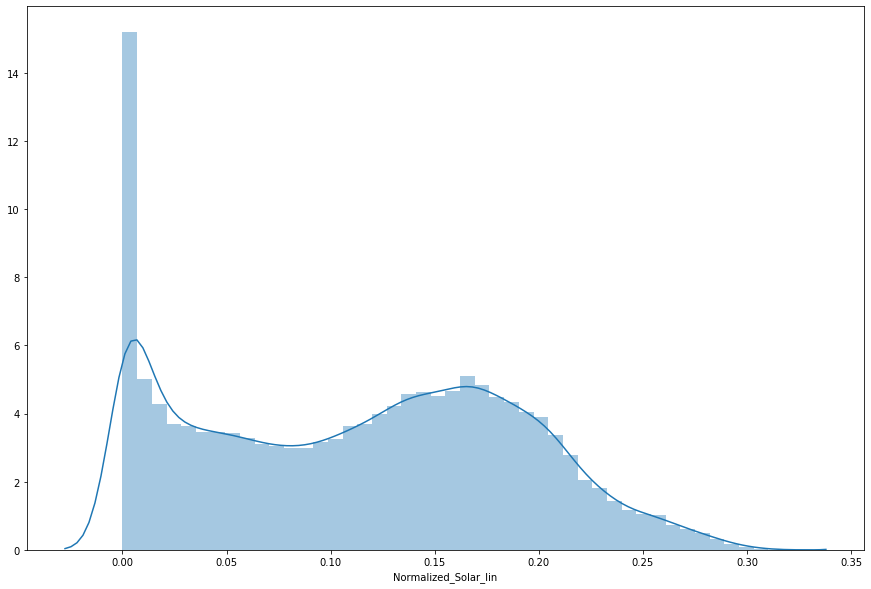

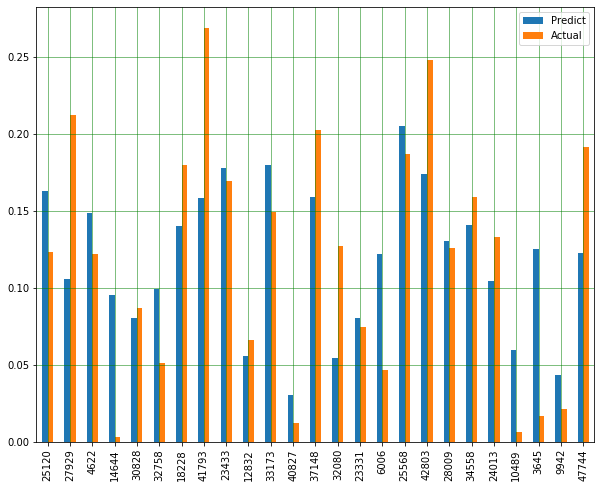

Mean Absolute Error: 0.04614343613712293
Mean Squared Error: 0.003205314954256964
Root Mean Squared Error: 0.05661550100685292
R Squared Error: 0.44750882711989204


,Coefficient
Relative Humidity,-0.001468
Solar Zenith Angle,-0.000833
GHI,0.000030


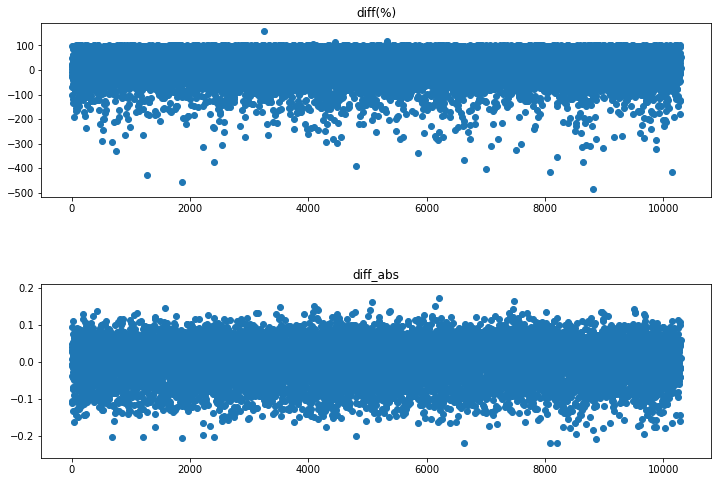

In [9]:
columns=['Relative Humidity', 'Solar Zenith Angle', 'GHI']
multilinear_regression_feature_selection(columns)

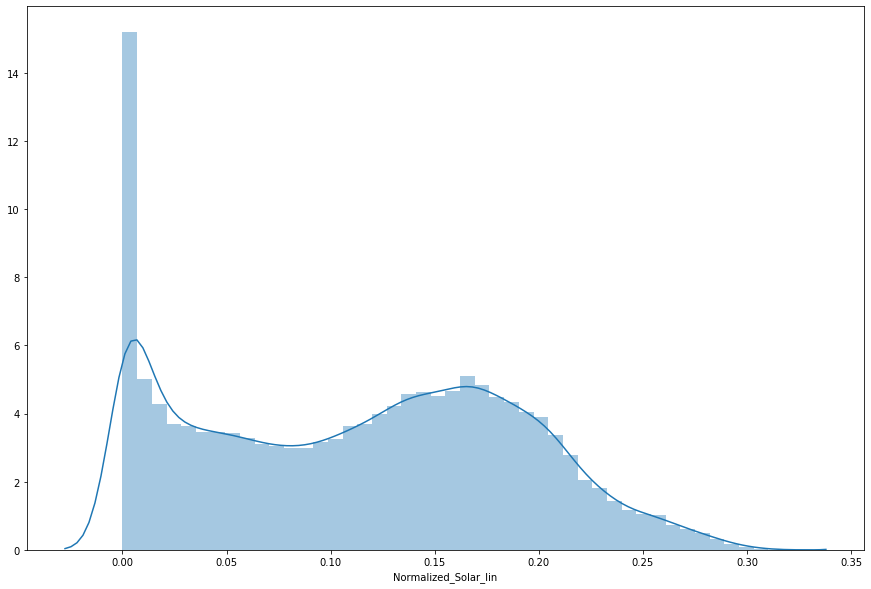

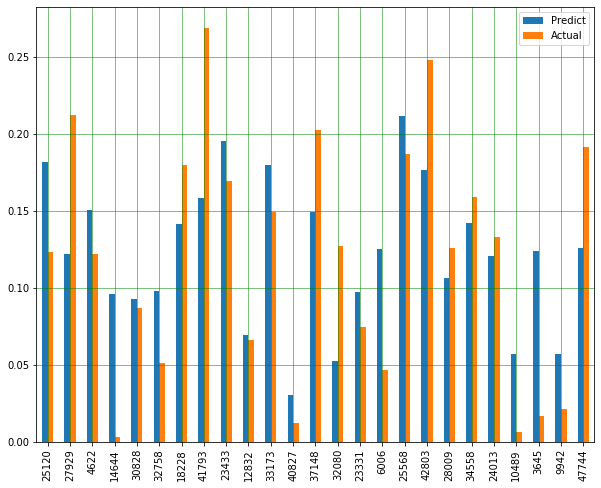

Mean Absolute Error: 0.04548451044024912
Mean Squared Error: 0.0031165790545546338
Root Mean Squared Error: 0.05582632940248386
R Squared Error: 0.4628039859428966


,Coefficient
Relative Humidity,-0.001613
Solar Zenith Angle,-0.000790
GHI,0.000027
Surface Albedo,-0.123480
Temperature,0.000148
Pressure,-0.001381


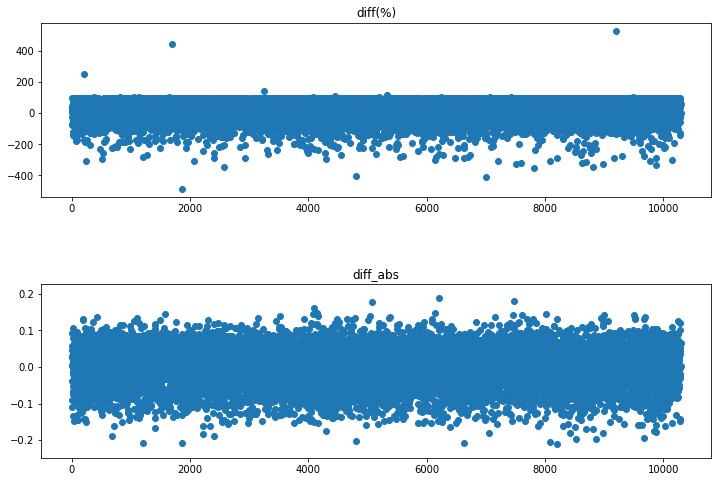

In [10]:
multilinear_regression_feature_selection(['Relative Humidity', 'Solar Zenith Angle', 'GHI','Surface Albedo','Temperature','Pressure'])

for all the columns we get:

In [11]:
columns_all= ['DHI', 'DNI', 'GHI', 'Cloud Type', 'Dew Point', 
             'Solar Zenith Angle', 'Surface Albedo', 'Wind Speed', 
             'Wind Direction', 'Relative Humidity', 'Temperature', 'Pressure']

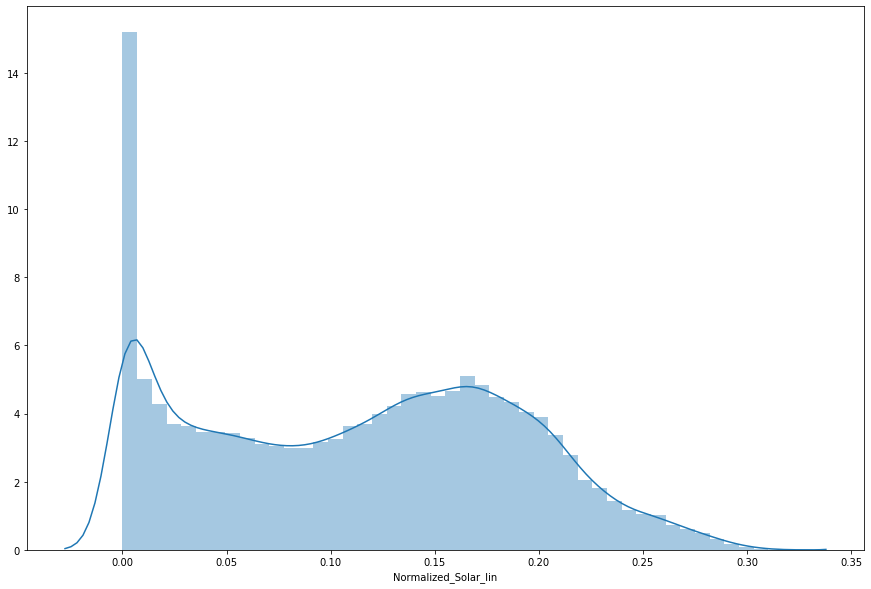

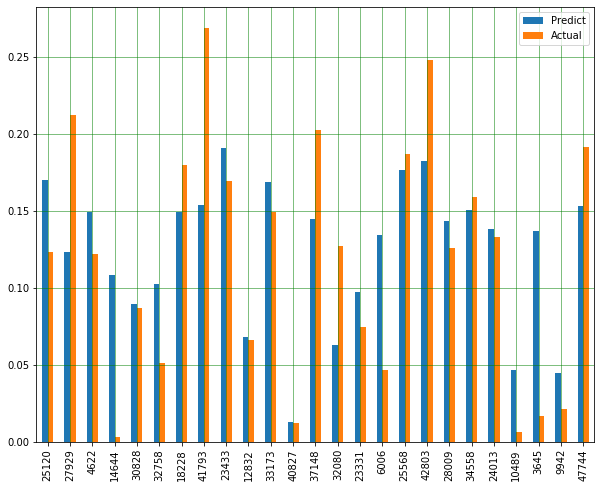

Mean Absolute Error: 0.043433902418776094
Mean Squared Error: 0.002969026308052691
Root Mean Squared Error: 0.05448877231185055
R Squared Error: 0.4882372401285021


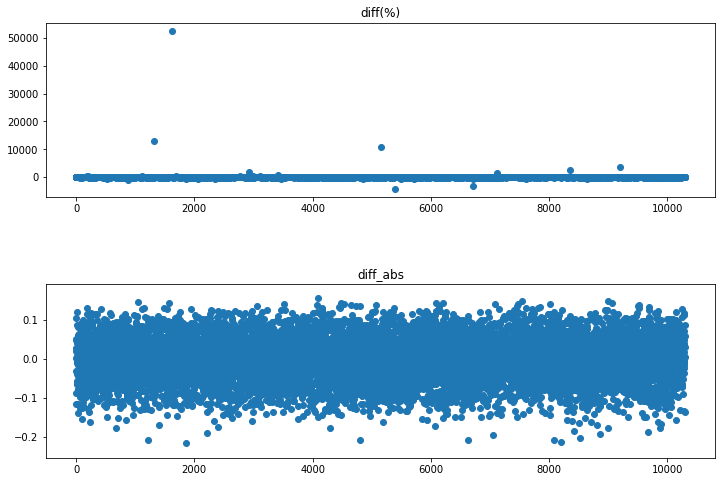

In [12]:
all_coefficent=multilinear_regression_feature_selection(columns_all)

In [13]:
all_coefficent

,Coefficient
DHI,0.000016
DNI,0.000066
GHI,-0.000054
Cloud Type,0.000926
Dew Point,0.007998
Solar Zenith Angle,-0.001080
Surface Albedo,-0.114004
Wind Speed,0.001475
Wind Direction,0.000049
Relative Humidity,-0.003390


In [14]:
all_coefficent.rank()

,Coefficient
DHI,7.0
DNI,9.0
GHI,6.0
Cloud Type,10.0
Dew Point,12.0
Solar Zenith Angle,5.0
Surface Albedo,1.0
Wind Speed,11.0
Wind Direction,8.0
Relative Humidity,3.0


From Random Forest result:\
Feature ranking:\
Relative Humidity 1. feature 9 (0.346642)\
Solar Zenith Angle 2. feature 5 (0.149772)\
GHI 3. feature 2 (0.090975)\
Surface Albedo 4. feature 6 (0.083799)\
Wind Direction 5. feature 8 (0.078191)\
Temperature 6. feature 10 (0.052759)\
Wind Speed 7. feature 7 (0.047079)\
DNI 8. feature 1 (0.037362)\
DHI 9. feature 0 (0.032601)\
Dew Point 10. feature 4 (0.032295)\
Pressure 11. feature 11 (0.031303)\
Cloud Type 12. feature 3 (0.017221)

for the real time data that we can get these features:

In [ ]:
realtime_columns = ['DHI', 'DNI', 'GHI','Solar Zenith Angle', 'Surface Albedo','Temperature']
X_columns_all= dataset[realtime_columns]
X_columns_all

K-fold cross-validation

In [16]:
from sklearn.model_selection import KFold

example for real time columns, because of we only have 6 features

KFold(n_splits=10, random_state=None, shuffle=True)
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [    4     8    18 ... 51424 51442 51446]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   10    22    27 ... 51457 51460 51463]
TRAIN: [    0     1     2 ... 51465 51467 51468] TEST: [    5    14    26 ... 51454 51458 51466]
TRAIN: [    0     1     3 ... 51466 51467 51468] TEST: [    2    16    25 ... 51432 51435 51438]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   17    30    52 ... 51403 51410 51431]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [    6    12    13 ... 51437 51445 51462]
TRAIN: [    0     2     3 ... 51465 51466 51467] TEST: [    1    20    33 ... 51451 51455 51468]
TRAIN: [    0     1     2 ... 51465 51466 51468] TEST: [    9    11    19 ... 51453 51459 51467]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   24    31    38 ... 51450 51461 51464]
TRAIN: [    1     2     4 ... 51466 51467 51468] TEST: [    0     3     7 .

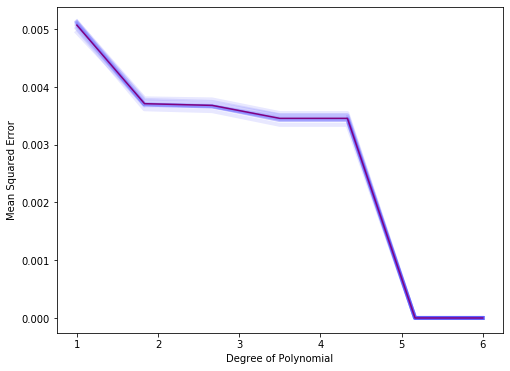

In [32]:
kf = KFold(n_splits=10, shuffle=True)# Define the split - into 10 folds 
kf.get_n_splits(X_columns_all, y)# returns the number of splitting iterations in the cross-validator
print(kf) 
fig, ax = plt.subplots(figsize=(8,6))

mse = np.zeros((7, 10))
j = 0
#creat train and test vars 
for train_index, test_index in kf.split(X_columns_all, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    #print("x-train[X_train.columns[0:2]]: ", X_train[X_train.columns[0:2].values])
    #print (X_train.shape, y_train.shape)
    #print (X_test.shape, y_test.shape)
    X_train, X_test = X_columns_all.iloc[train_index], X_columns_all.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for i in range(1, 6):
        reg = LinearRegression().fit(X_train[X_train.columns[0:i].values], y_train)#use first i features train 
        y_pred = reg.predict(X_test[X_test.columns[0:i].values])

        mse[i-1, j] = metrics.mean_squared_error(y_test, y_pred)

    
    ax.plot(np.linspace(1, 6, 7), mse[:, j], linewidth=4, color='b', alpha=0.09)
    ax.set_ylabel('Mean Squared Error')
    ax.set_xlabel('Degree of Polynomial')
    j += 1
    
avg_mse = mse.mean(axis=1)
ax.plot(np.linspace(1, 6, 7), avg_mse, color='purple')

create a dataframe whose feature are selected from MLR 

In [19]:
a1=dataset['Surface Albedo']
a2=dataset['Temperature']
a3=dataset['Relative Humidity']
a5=dataset['Pressure']
a4=dataset['Solar Zenith Angle']
list_of_tuples=list(zip(a1,a2,a3,a4,a5))
df_testX=pd.DataFrame(list_of_tuples,columns=['Surface Albedo','Temperature','Relative Humidity','Solar Zenith Angle','Pressure'])
df_testX

,Surface Albedo,Temperature,Relative Humidity,Solar Zenith Angle,Pressure
0,0.143,11.0,96.35,82.67,1010.0
1,0.143,11.0,96.38,77.27,1010.0
2,0.143,11.0,96.05,72.18,1010.0
3,0.143,11.0,96.08,67.46,1010.0
4,0.143,12.0,89.10,63.22,1010.0
...,...,...,...,...,...
51464,0.140,12.4,87.95,73.86,1012.0
51465,0.140,11.9,90.88,79.03,1012.0
51466,0.140,11.4,86.49,84.45,1013.0
51467,0.140,11.4,86.49,89.79,1013.0


In [20]:
df_testX

,Surface Albedo,Temperature,Relative Humidity,Solar Zenith Angle,Pressure
0,0.143,11.0,96.35,82.67,1010.0
1,0.143,11.0,96.38,77.27,1010.0
2,0.143,11.0,96.05,72.18,1010.0
3,0.143,11.0,96.08,67.46,1010.0
4,0.143,12.0,89.10,63.22,1010.0
...,...,...,...,...,...
51464,0.140,12.4,87.95,73.86,1012.0
51465,0.140,11.9,90.88,79.03,1012.0
51466,0.140,11.4,86.49,84.45,1013.0
51467,0.140,11.4,86.49,89.79,1013.0


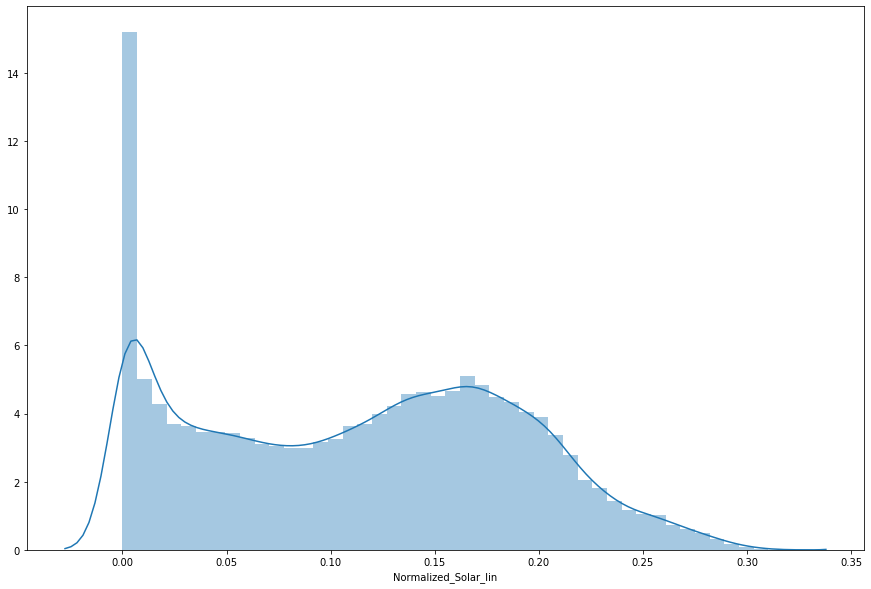

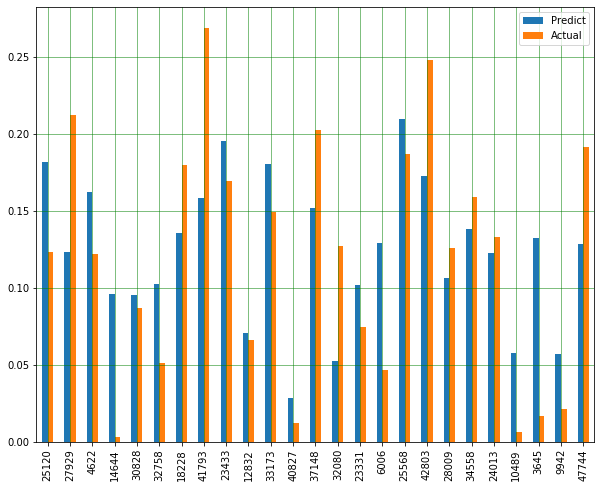

Mean Absolute Error: 0.045442843566694646
Mean Squared Error: 0.003119112382200905
Root Mean Squared Error: 0.05584901415603417
R Squared Error: 0.46236732334263675


,Coefficient
Surface Albedo,-0.133058
Temperature,0.000241
Relative Humidity,-0.001762
Solar Zenith Angle,-0.000975
Pressure,-0.001368


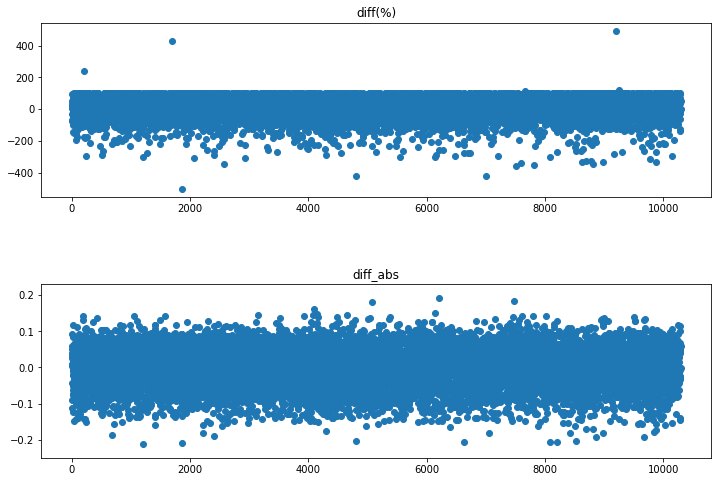

In [30]:
multilinear_regression_feature_selection(df_testX.columns)

In [21]:
def kfold_CV(X_columns_all):
    kf = KFold(n_splits=10, shuffle=True)# Define the split - into 10 folds 
    kf.get_n_splits(X_columns_all, y)# returns the number of splitting iterations in the cross-validator
    print(kf) 
    fig, ax = plt.subplots(figsize=(8,6))

    mse = np.zeros((12, 10))
    j = 0
    #creat train and test vars 
    for train_index, test_index in kf.split(X_columns_all, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        #print("x-train[X_train.columns[0:2]]: ", X_train[X_train.columns[0:2].values])
        #print (X_train.shape, y_train.shape)
        #print (X_test.shape, y_test.shape)
        X_train, X_test = X_columns_all.iloc[train_index], X_columns_all.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        for i in range(1, 13):
            reg = LinearRegression().fit(X_train[X_train.columns[0:i].values], y_train)#use first i features train 
            y_pred = reg.predict(X_test[X_test.columns[0:i].values])

            mse[i-1, j] = metrics.mean_squared_error(y_test, y_pred)


        ax.plot(np.linspace(1, 11, 12), mse[:, j], linewidth=4, color='b', alpha=0.09)
        ax.set_ylabel('Mean Squared Error')
        ax.set_xlabel('Degree of Polynomial')
        j += 1

    avg_mse = mse.mean(axis=1)
    ax.plot(np.linspace(1, 11, 12), avg_mse, color='purple')

KFold(n_splits=10, random_state=None, shuffle=True)
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   27    33    44 ... 51449 51451 51457]
TRAIN: [    0     1     2 ... 51465 51466 51467] TEST: [    7    13    20 ... 51404 51460 51468]
TRAIN: [    1     3     4 ... 51465 51466 51468] TEST: [    0     2    15 ... 51437 51463 51467]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [    8    12    24 ... 51424 51438 51447]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   10    14    18 ... 51443 51444 51452]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [    5    11    25 ... 51455 51456 51459]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [   40    53    54 ... 51431 51433 51462]
TRAIN: [    0     1     2 ... 51465 51467 51468] TEST: [    4    16    17 ... 51448 51464 51466]
TRAIN: [    0     1     2 ... 51466 51467 51468] TEST: [    9    21    64 ... 51450 51453 51454]
TRAIN: [    0     2     4 ... 51466 51467 51468] TEST: [    1     3     6 .

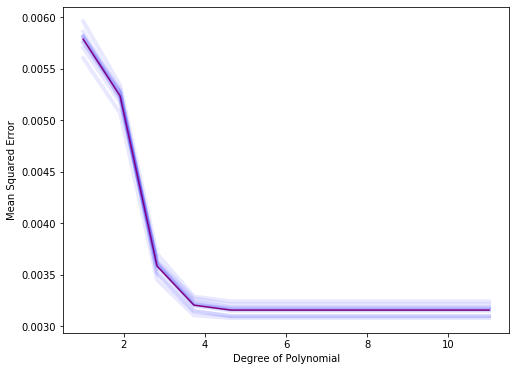

In [22]:
kfold_CV(df_testX)

In [23]:
columns

['Relative Humidity', 'Solar Zenith Angle', 'GHI']

In [24]:
columns_all

['DHI',
 'DNI',
 'GHI',
 'Cloud Type',
 'Dew Point',
 'Solar Zenith Angle',
 'Surface Albedo',
 'Wind Speed',
 'Wind Direction',
 'Relative Humidity',
 'Temperature',
 'Pressure']

In [25]:
RFcolumns=['Relative Humidity','Solar Zenith Angle','GHI','Surface Albedo','Wind Direction']

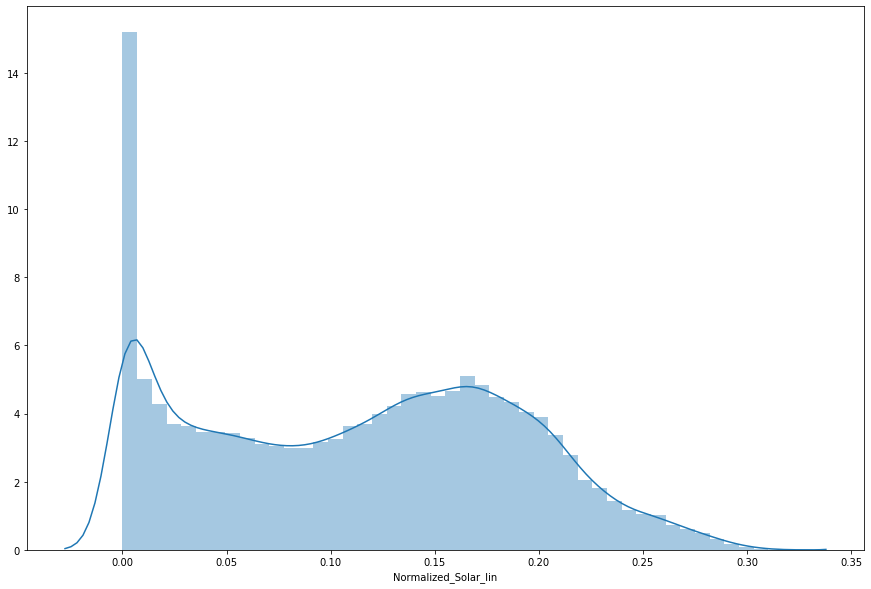

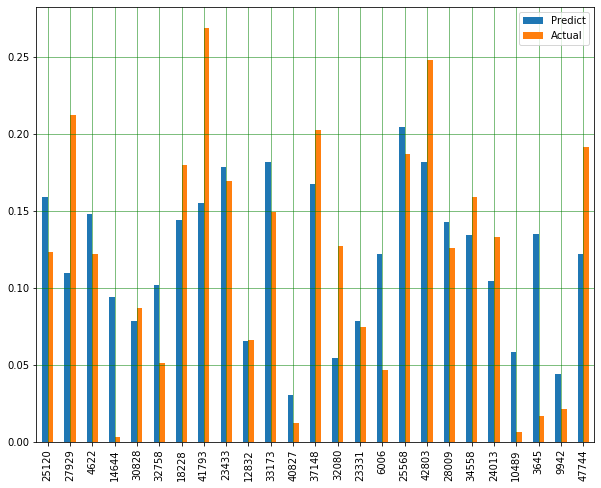

Mean Absolute Error: 0.04588692912468883
Mean Squared Error: 0.00318287413958038
Root Mean Squared Error: 0.05641696677047056
R Squared Error: 0.45137688757510097


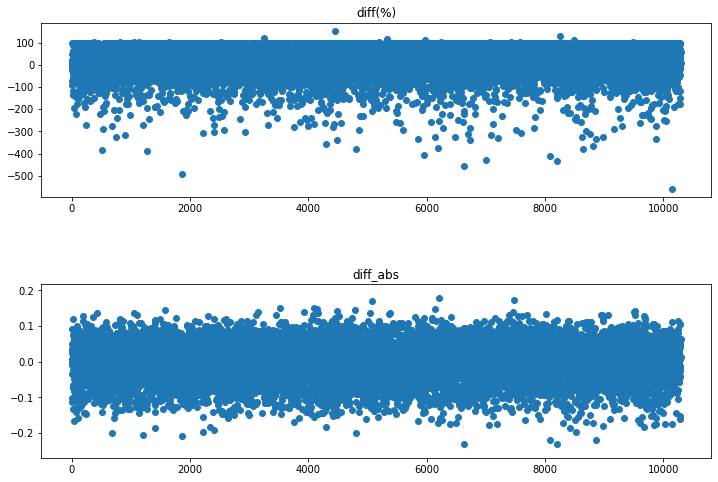

In [26]:

    X =  dataset[RFcolumns]
    y = dataset['Normalized_Solar_lin']
    plt.figure(figsize=(15,10))
    plt.tight_layout()
    seabornInstance.distplot(dataset['Normalized_Solar_lin'])
    #split to train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression() 
    #fit train data
    regressor.fit(X_train, y_train)
    regressor.coef_
    #get coeff from fit
    coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) 
    #predict test data
    y_pred = regressor.predict(X_test)
    #df for test data with predict and actual
    df = pd.DataFrame({'Predict': y_pred,'Actual': y_test})
    #show only first 25 rows
    df1 = df.head(25)
    df1
    df1.plot(kind='bar',figsize=(10,8))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
    #calculate normalized diff(%) and diff between predict and actual from test data 
    diff = []
    diff_abs=[]
    for i in range(len(df)):
        diff.append((df.iloc[i][0]-df.iloc[i][1])/(df.iloc[i][0])*100)
        diff_abs.append((df.iloc[i][0]-df.iloc[i][1]))
    diff
    diff_abs
    df_diff = pd.DataFrame({'diff': diff})
    df_diff_abs = pd.DataFrame({'diff_abs': diff_abs})
    df_diff_index = df_diff.reset_index()
    df_diff_abs_index = df_diff_abs.reset_index()
    fig, (ax1,ax2) = plt.subplots(2, figsize=(12,8))
    fig.subplots_adjust(hspace=0.5)
    ax1.scatter(df_diff_index.index, df_diff_index['diff'])
    ax1.set_title("diff(%)")
    ax2.scatter(df_diff_abs_index.index, df_diff_abs_index['diff_abs'])
    ax2.set_title("diff_abs")
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R Squared Error:', r2_score(y_test, y_pred))

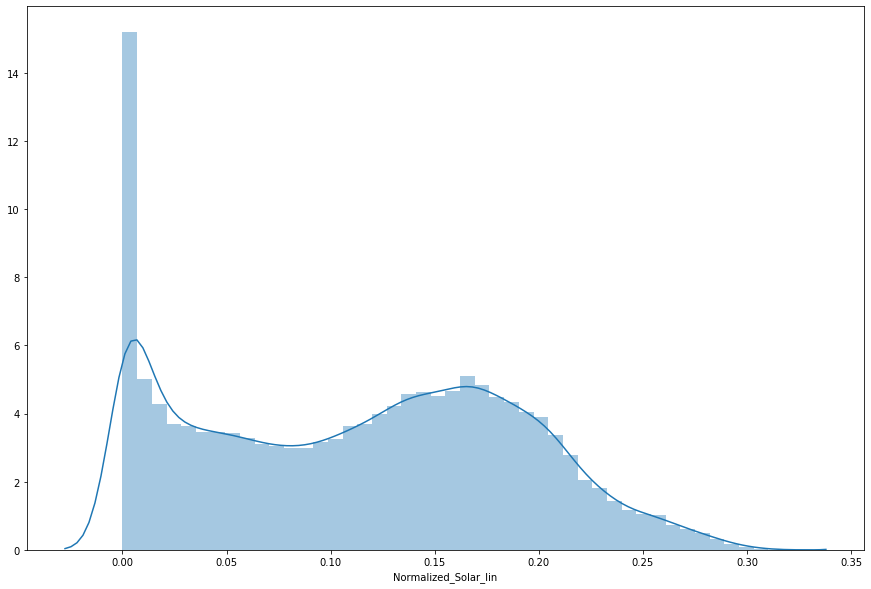

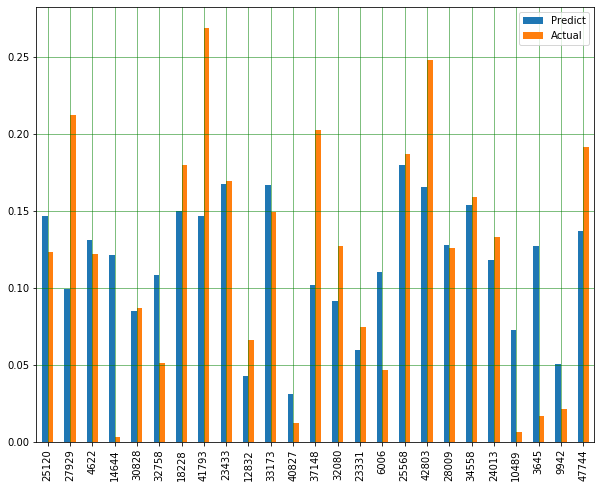

Mean Absolute Error: 0.047140692218645405
Mean Squared Error: 0.0034113882012365843
Root Mean Squared Error: 0.05840709033359378
R Squared Error: 0.41198855795826905


,Coefficient
DHI,0.000064
DNI,0.000104
GHI,-0.000059
Solar Zenith Angle,-0.001304
Surface Albedo,-0.069790
Temperature,0.001132


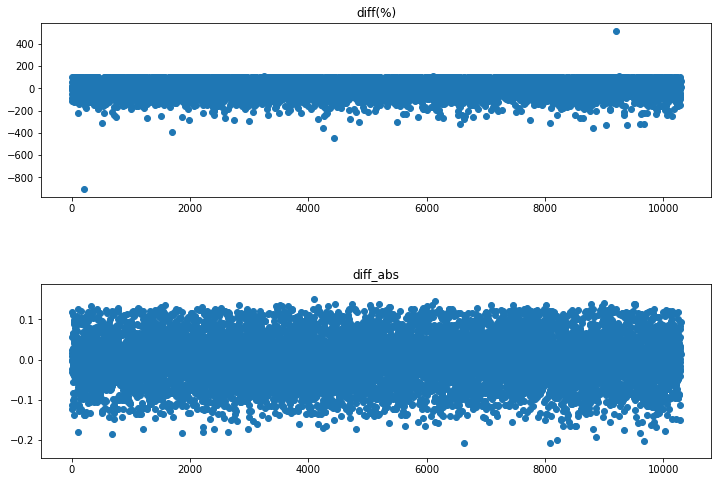

In [27]:
multilinear_regression_feature_selection(realtime_columns)

Doing multilinear regressin form top 5 multilinear selected feature, we get R2 0.46236732334263675;\
from RandomForest top 5 selected feature we get R2 0.45137\
while only use real time R2 0.41198855795826905

from K-fold we can see that the more featrues we choose, the smaller mse we will get. Due to the limited features for real time data we can get, I can only use these 6 features from real time data for our model. But through the K-fold for these 6 feature, we can also say that we should use all the features. 